<a href="https://colab.research.google.com/github/AtifRonan2843/Machine-Learning-Projects/blob/main/Projects_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
plt.ion()
import numpy as np
import pandas as pd

In [ ]:
(X_train, y_train), (X_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_train_norm=X_train/255
X_test_norm=X_test/255

In [ ]:
def encode1(y):
    ret = keras.utils.to_categorical(
        y, num_classes=10
    )  # Remove dtype argument
    ret = ret.astype('float32')  # Convert to float32 after
    return ret

In [ ]:
y_test_cat=encode1(y_test)
y_train_cat=encode1(y_train)

In [ ]:
y_test_cat[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
     keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
              metrics=['accuracy'] )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train_norm,y_train_cat,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.2564 - loss: 2.1498
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3747 - loss: 1.7411
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4017 - loss: 1.6535
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4298 - loss: 1.5856
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4433 - loss: 1.5367
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4507 - loss: 1.5214
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4708 - loss: 1.4723
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4819 - loss: 1.4376
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4946 - loss: 1.4103
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4956 - loss: 1.3907
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5149 - loss: 1.3520
Epoch 12/50
1563/15

In [ ]:
model.evaluate(X_test_norm,y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4315 - loss: 3.9185


[3.9332480430603027, 0.4417000114917755]

# **Project 2**
**Customer churn Prediction**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
plt.ion()
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.drop('customerID',axis='columns',inplace=True)

In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.dropna(inplace=True)



In [ ]:
print(len(df.isnull()))

7043


In [ ]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [ ]:
df=df[df.TotalCharges!=' ']



---
**Encoding**



In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

<ipython-input-11-97ac71a190df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TotalCharges=pd.to_numeric(df.TotalCharges)


In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
cat=[]
for i in df:
  if df[i].dtypes=='object':
    print(f'{i} : {df[i].unique()}')
    if 'Yes' in df[i].unique() and 'No' in df[i].unique():
      cat.append(i)
print(cat)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [ ]:
for i in cat:
  temp=''
  for j in df[i].unique():
    if 'No' in j:
      df[i].replace(j,'No',inplace=True)

<ipython-input-14-7fb58f88d528>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace(j,'No',inplace=True)
<ipython-input-14-7fb58f88d528>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i].replace(j,'No',inplace=True)


In [ ]:
for i in df:
  if df[i].dtypes=='object':
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
for i in cat:
  df[i].replace({'Yes':1,"No":0},inplace=True)

<ipython-input-16-5ffe3e2c09ad>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].replace({'Yes':1,"No":0},inplace=True)
<ipython-input-16-5ffe3e2c09ad>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[i].replace({'Yes':1,"No":0},inplace=True)
<ipython-input-16-5ffe3e2c09ad>:2: SettingWithCo

In [ ]:
for i in df:
  print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df['gender'].replace({'Female':1,"Male":0},inplace=True)

<ipython-input-18-65d702770c86>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'Female':1,"Male":0},inplace=True)
<ipython-input-18-65d702770c86>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'Female':1,"Male":0},inplace=True)
<ipython-input-18-65d702

In [ ]:
for i in df:
  print(f'{i} : {df[i].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
df=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'],dtype='int64')

In [ ]:
for i in df:
  print(f'{i} : {df[i].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
InternetService_No : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]
PaymentMethod_Bank transfer (automatic) : [0 1]
PaymentMethod_Credit card (automatic) : [0 1]
PaymentMethod_Electronic check : [1 0]
PaymentMethod_Mailed check : [0 1]




---
# **Normalization**



In [ ]:
def max(col):
  max=0
  for i in col:
    if i>max:
      max=i
  return max


In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [ ]:
scale=['tenure','MonthlyCharges','TotalCharges']
# for i in scale:
#   df[i]=df[i]/max(df[i])

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df[scale]=scaler.fit_transform(df[scale])

In [ ]:
df.sample(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2495,1,0,1,0,0.521127,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
210,0,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3070,1,0,0,0,0.070423,0,0,1,1,0,...,1,0,0,1,0,0,0,1,0,0
2187,0,0,1,0,0.985915,1,1,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2233,0,0,0,0,0.746479,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
6517,1,0,1,1,0.070423,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
3282,0,0,1,0,0.830986,1,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0
1434,0,0,0,0,0.154930,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
6315,1,0,1,1,0.661972,1,0,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1429,0,0,1,1,0.619718,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
X=df.drop('Churn',axis='columns')
y=df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [ ]:
df.shape

(7032, 27)

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(10,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7417 - loss: 0.5598
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.4286
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4204
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8049 - loss: 0.4156
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4166
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8164 - loss: 0.4004
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8143 - loss: 0.4074
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8055 - loss: 0.4146
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8092 - loss: 0.4083
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8169 - loss: 0.3916
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8135 - loss: 0.4025
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [ ]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8052 - loss: 0.4406


[0.4517320692539215, 0.7896233201026917]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred = model.predict(X_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.09955631]
 [0.5699891 ]
 [0.00834171]
 ...
 [0.730053  ]
 [0.5711805 ]
 [0.5819591 ]]


In [ ]:
y_pred_round=[]
for i in y_pred:
  if i>0.5: y_pred_round.append(1)
  else: y_pred_round.append(0)

In [ ]:
print(classification_report(y_test,y_pred_round))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       999
           1       0.68      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

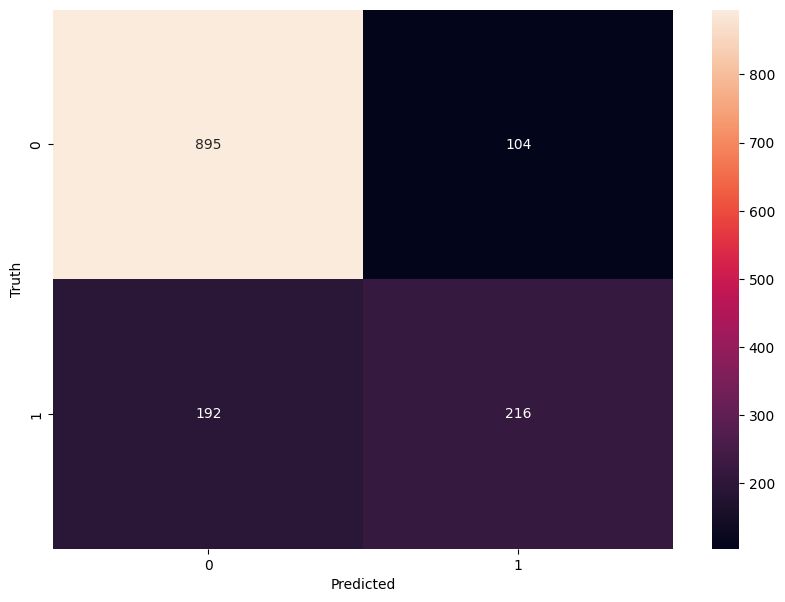

In [ ]:
import seaborn as sns
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_round)

plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')